In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


In [3]:
import sys
sys.path.append("..")

from scripts.plot_style import *
stdrcparams(usetex=True) # personal plot style
figsize=stdfigsize(ratio=-1)
xs,ys = figsize

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from collections import defaultdict
from glob import glob

In [5]:
classifiers = ['ExtraTreeClassifier',
 'DecisionTreeClassifier',
 'MLPClassifier',
 'KNeighborsClassifier',
 'SGDClassifier',
 'RidgeClassifierCV',
 'RidgeClassifier',
 'PassiveAggressiveClassifier',
 'GaussianProcessClassifier',
 'AdaBoostClassifier',
 'GradientBoostingClassifier',
 'BaggingClassifier',
 'RandomForestClassifier',
 'BernoulliNB',
 'CalibratedClassifierCV',
 'GaussianNB',
 'LabelPropagation',
 'LabelSpreading',
 'LinearDiscriminantAnalysis',
 'LinearSVC',
 'LogisticRegression',
 'LogisticRegressionCV',
 'NearestCentroid',
 'NuSVC',
 'Perceptron',
 'QuadraticDiscriminantAnalysis',
 'SVC']

In [6]:
acc0 = {}
acc0[1] = {
    2:0.943,
    3:0.920,
    4:0.886,
    5:0.884,
    6:0.867,
    7:0.868,
    8:0.856,
    9:0.848,
}
acc0[0.5] = {
    2:0.785402,
    3:0.669944,
    4:0.570805,
    5:0.544449,
    6:0.499272,
    7:0.490666,
    8:0.447034,
    9:0.42774,
}
acc0[0.8] = {
    2:0.897048,
    3:0.850458,
    4:0.794097,
    5:0.786733,
    6:0.75978,
    7:0.759422,
    8:0.738019,
    9:0.725462,
}
acc0[1.2] = {
    2:0.97111,
    3:0.960265,
    4:0.94222,
    5:0.941491,
    6:0.932591,
    7:0.933445,
    8:0.92732,
    9:0.922961,
}

acc0[1.5] = {
    2:0.991147,
    3:0.988063,
    4:0.982294,
    5:0.982214,
    6:0.979343,
    7:0.979708,
    8:0.977818,
    9:0.976392,
}

acc0[2]={
    2:0.999217,
    3:0.998955,
    4:0.998435,
    5:0.998434,
    6:0.998174,
    7:0.99821,
    8:0.998043,
    9:0.997913,
}

acc0[3]={
    2:1,
    3:1,
    4:1,
    5:1,
    6:1,
    7:1,
    8:1,
    9:1,
}

acc0[5]=acc0[3]

In [7]:
from math import sqrt, exp
df = defaultdict(list)
files = [f for f in glob('../experiments/fullex_G*.sh.o333*') if 3335563<=int(f[-7:])<=3335662]
for f in files:
    with open(f) as file: 
        for line in file:
            line = line.lstrip('[').rstrip(']\n')
            data = line.split(', array')
            temp = eval(data[0])
            for j in range(5):
                df['Ref'].append((temp[2],temp[3]))
                df["Number of samples"].append(temp[0])
                df["Number of uninformative features"].append(temp[1])
                df["Signal/Noise ratio"].append(round((1+temp[3])/sqrt(0.1),1)/(temp[1]+10**-64))
                df["Feature/Dist ratio"].append((temp[1])/exp((round((1+temp[3])/sqrt(0.1),1))))
                df["Number of clusters"].append(temp[2])
                df["Distance between clusters"].append(1+temp[3])
                df["Separation between clusters"].append(round((1+temp[3])/sqrt(0.1),1))
                for i, cls in enumerate(classifiers):
                    df[cls].append(eval(data[i+1])[j])
data = pd.DataFrame.from_dict(df)
data.head()

Ref  Number of samples  Number of uninformative features  \
0  (6, 0.2)                100                                 2   
1  (6, 0.2)                100                                 2   
2  (6, 0.2)                100                                 2   
3  (6, 0.2)                100                                 2   
4  (6, 0.2)                100                                 2   

   Signal/Noise ratio  Feature/Dist ratio  Number of clusters  \
0                 1.9            0.044742                   6   
1                 1.9            0.044742                   6   
2                 1.9            0.044742                   6   
3                 1.9            0.044742                   6   
4                 1.9            0.044742                   6   

   Distance between clusters  Separation between clusters  \
0                        1.2                          3.8   
1                        1.2                          3.8   
2                        1.2                          3.8   
3                        1.2                          3.8   
4                        1.2                          3.8   

   ExtraTreeClassifier  DecisionTreeClassifier  ...  LabelSpreading  \
0             0.791667                0.850000  ...        0.916667   
1             0.841667                0.950000  ...        0.975000   
2             0.791667                0.900000  ...        0.916667   
3             0.750000                0.891667  ...        0.916667   
4             0.800000                0.858333  ...        0.908333   

   LinearDiscriminantAnalysis  LinearSVC  LogisticRegression  \
0                    0.925000   0.841667            0.866667   
1                    0.966667   0.883333            0.883333   
2                    0.916667   0.883333            0.883333   
3                    0.933333   0.900000            0.866667   
4                    0.950000   0.883333            0.883333   

   LogisticRegressionCV  NearestCentroid     NuSVC  Perceptron  \
0              0.816667         0.925000  0.925000    0.683333   
1              0.850000         0.975000  0.975000    0.641667   
2              0.766667         0.900000  0.908333    0.683333   
3              0.841667         0.925000  0.916667    0.766667   
4              0.833333         0.958333  0.950000    0.633333   

   QuadraticDiscriminantAnalysis       SVC  
0                       0.925000  0.925000  
1                       0.966667  0.966667  
2                       0.916667  0.916667  
3                       0.925000  0.925000  
4                       0.933333  0.950000  

[5 rows x 35 columns]

In [8]:
palette3 = [
"#f7fcb9",
"#d9f0a3",
"#addd8e",
"#78c679",
"#41ab5d",
"#238443",
"#006837",
"#004529",
]

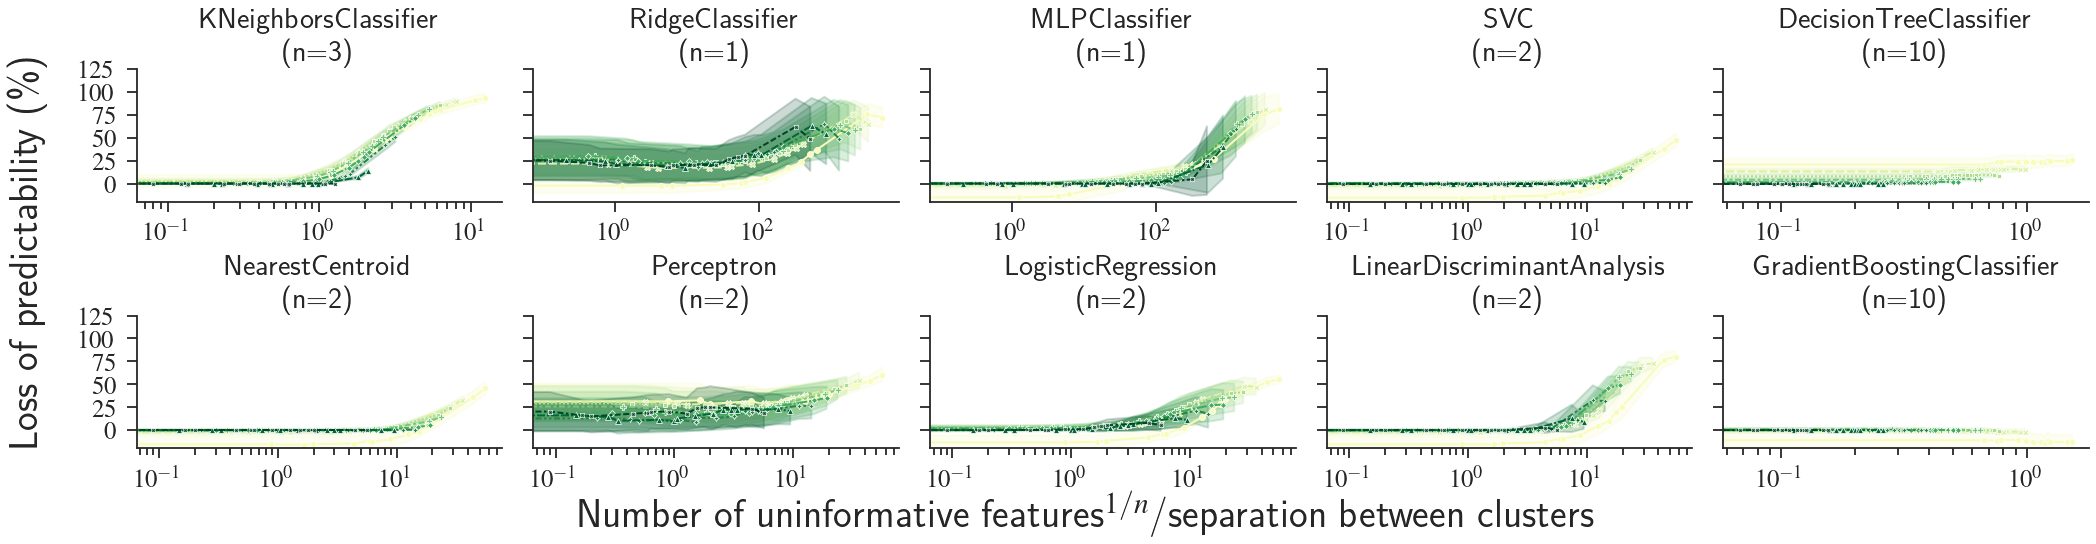

In [9]:
classes_list = [['KNeighborsClassifier','NearestCentroid',],
    [ 'RidgeClassifier','Perceptron'],
    ['MLPClassifier', 'LogisticRegression',], 
     [ 'SVC', 'LinearDiscriminantAnalysis'],
    ['DecisionTreeClassifier', 'GradientBoostingClassifier'],
]
hue_order= [i for i in sorted(data['Separation between clusters'].unique())[0:8]]
orders = np.array([[1/4,1/2,1/2,1/3,1/10],
          [1/3,1/2,1/4,1/2,1/10]]).T
orders = np.array([[1/3,1,1,1/2,1/10],
          [1/2,1/2,1/2,1/2,1/10]]).T
fig,ax =plt.subplots(2, len(classes_list),figsize=(xs*len(classes_list)/2,ys))
for i, classes in enumerate(classes_list):
    for nn, cls in enumerate(classes): 
        order = orders[i][nn]
        df = data[data['Number of samples']==1000].copy()
        df=df.explode(cls).reset_index()
        df[cls] = df[cls].astype(float)
        df['Relative loss of accuracy'] = df.apply(lambda row: 
                  (acc0[row['Distance between clusters']][row['Number of clusters']]
                   -row[cls])/(acc0[row['Distance between clusters']][row['Number of clusters']]-1/row['Number of clusters'])*100,axis=1)
        df["Feature/Dist ratio"] = df.apply(lambda row: (row["Number of uninformative features"])**(order)/row["Separation between clusters"], axis=1)
        df = df[["Number of uninformative features",
                 'Relative loss of accuracy',
                 'Number of samples',
                 'Feature/Dist ratio',
                 "Separation between clusters",
                 cls]].reset_index(drop=True)

        df['Number of samples'] = df['Number of samples'].astype('int').astype('str')
        if cls == 'DecisionTreeClassifier':
            sns.lineplot(hue="Separation between clusters",style="Separation between clusters", y='Relative loss of accuracy',markers=True,
                         x= "Feature/Dist ratio",style_order=hue_order,
                         hue_order=hue_order,
                         palette=sns.color_palette(palette3),#legend=None,
                         data=df,linewidth=2,ax = ax[nn,i],err_style="band",ci='sd',err_kws={'linewidth':2})
            handles, labels = ax[nn,i].get_legend_handles_labels()
            ax[nn,i].get_legend().remove()
        else:
            sns.lineplot(hue="Separation between clusters" ,style="Separation between clusters",y='Relative loss of accuracy',markers=True,
                         x= "Feature/Dist ratio",style_order=hue_order,
                         hue_order=hue_order,
                         palette=sns.color_palette(palette3),
                         data=df,linewidth=2,legend=None,ax = ax[nn,i], err_style="band",ci='sd',err_kws={'linewidth':2})

        custom_frame(ax[nn,i])
        ax[nn,i].set_xscale('log')
        ax[nn,i].set_ylim(-20,125)
        ax[nn,i].set_yticks([0,25,50,75,100,125])
        ax[nn,i].set_xlabel('') 
        ax[nn,i].set_title(f"{cls}\n (n={int(1/order)})",fontsize=30,position=(0.5, 0.95))
        if nn!=1:
            ax[nn,i].set_xlabel('') 
        if i!=0:
            ax[nn,i].set_ylabel('') 
            ax[nn,i].set_yticklabels([])
            ax[nn,i].tick_params(labelleft=False)
        elif nn!=2:
            ax[nn,i].set_ylabel('') 
plt.subplots_adjust(wspace=0.1,hspace=0.3)
fig.text(-0.03, 0.5,'Loss of predictability (\%)',va='center',rotation='vertical',fontsize=40)
fig.text(0.5, -0.05, r'Number of uninformative features$^{1/n}$/separation between clusters', ha='center',fontsize=40)
plt.tight_layout()
# plt.savefig(f'../PUB_Figs/Fig3a.pdf',bbox_inches='tight',transparent=True)
plt.show() 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


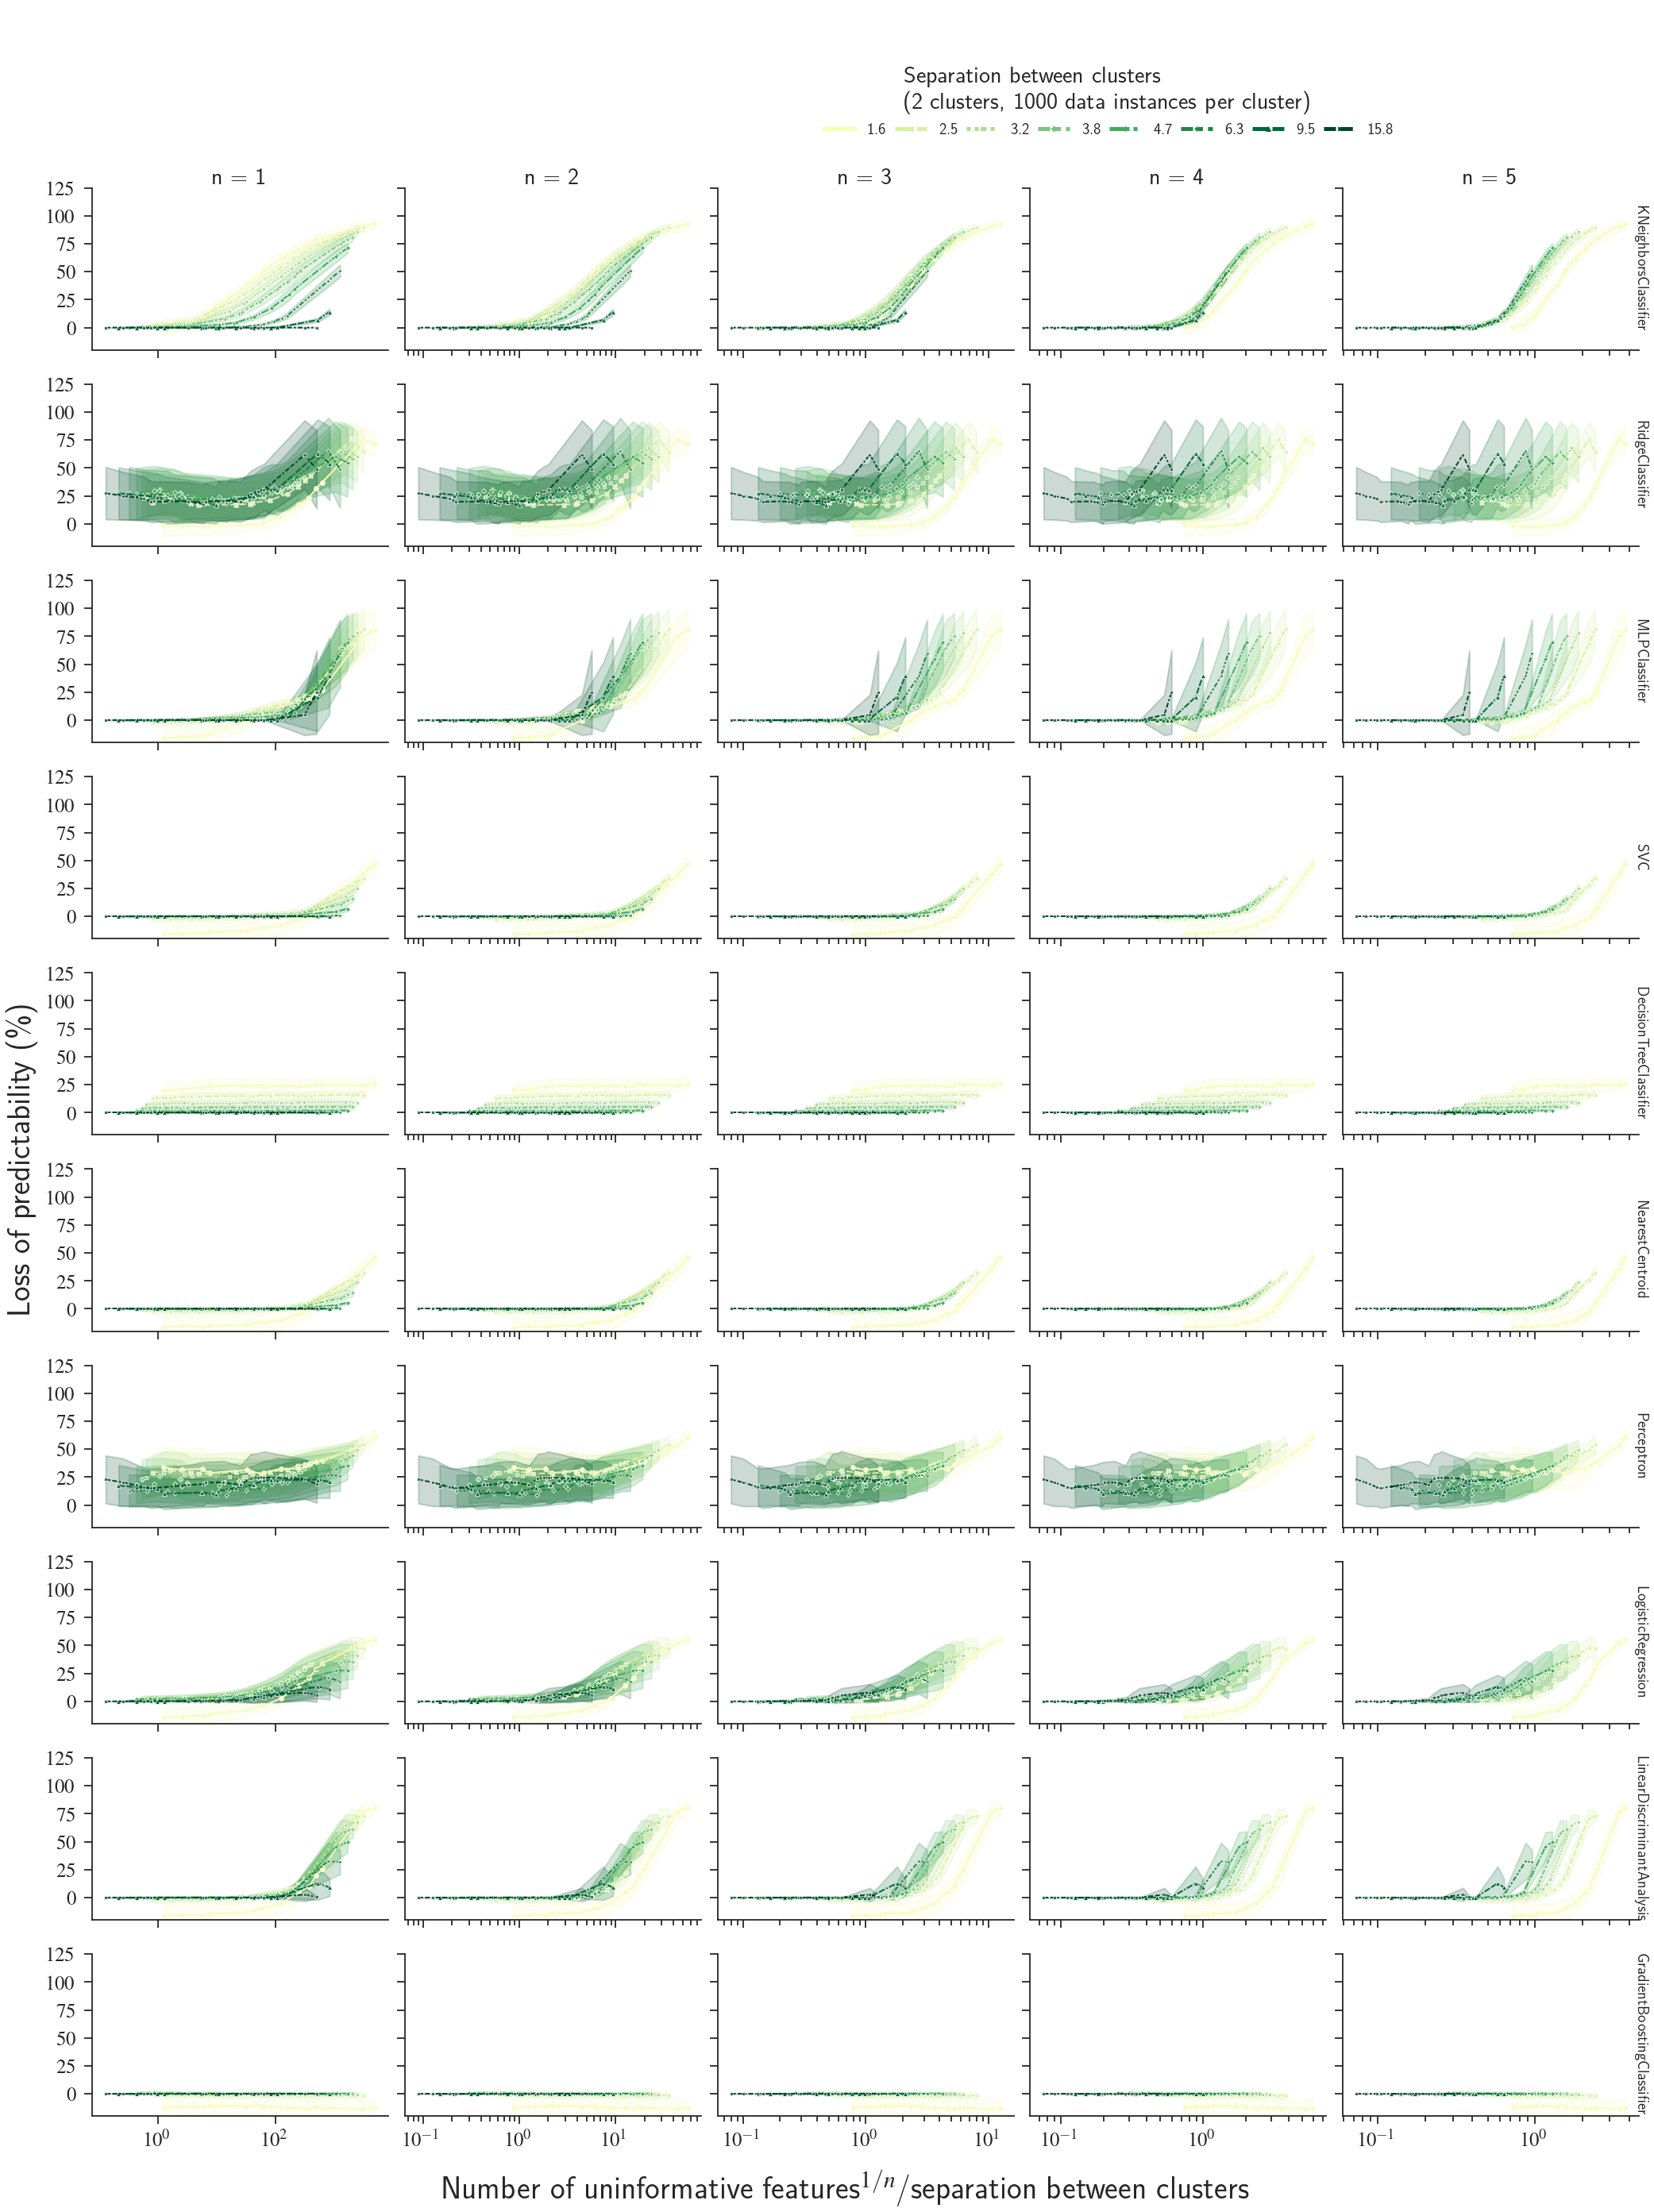

In [10]:
classes_list = ['KNeighborsClassifier', 'RidgeClassifier', 'MLPClassifier',
        'SVC', 'DecisionTreeClassifier','NearestCentroid', 'Perceptron', 'LogisticRegression',
        'LinearDiscriminantAnalysis', 'GradientBoostingClassifier']

orders =  [1,1/2,1/3,1/4,1/5]#,1/6,1/7,1/8,1/9,1/10]
hue_order= [i for i in sorted(data['Separation between clusters'].unique())[0:8]]
fig,ax =plt.subplots(10, 5,figsize=(xs*5/2,ys*5))
for nn, cls in enumerate(classes_list):
    df = data[data['Number of samples']==1000].copy()
    df=df.explode(cls).reset_index()
    df[cls] = df[cls].astype(float)
    df['Relative loss of accuracy'] = df.apply(lambda row: 
              (acc0[row['Distance between clusters']][row['Number of clusters']]
               -row[cls])/(acc0[row['Distance between clusters']][row['Number of clusters']]-1/row['Number of clusters'])*100,axis=1)
    for i, order in enumerate(orders):   
        df["Feature/Dist ratio"] = df.apply(lambda row: (row["Number of uninformative features"]+2)**(order)/row["Separation between clusters"], axis=1)
        df = df[["Number of uninformative features",
                 'Relative loss of accuracy',
                 'Number of samples',
                 'Feature/Dist ratio',
                 "Separation between clusters",
                 cls]].reset_index(drop=True)

        df['Number of samples'] = df['Number of samples'].astype('int').astype('str')
 
        sns.lineplot(hue="Separation between clusters" ,style="Separation between clusters",y='Relative loss of accuracy',markers=True,
                     x= "Feature/Dist ratio",style_order=hue_order,
                     hue_order=hue_order,
                     palette=sns.color_palette(palette3),
                     data=df,linewidth=2,ax = ax[nn,i], err_style="band",ci='sd',err_kws={'linewidth':2})
        handles, labels = ax[nn,i].get_legend_handles_labels()
        ax[nn,i].get_legend().remove()

        custom_frame(ax[nn,i])
        ax[nn,i].set_xscale('log')

        ax[nn,i].set_ylim(-20,125)
        ax[nn,i].set_yticks([0,25,50,75,100,125])
        ax[nn,i].set_xlabel('') 

        if nn==0:
            ax[nn,i].set_title(f'n = {int(1/order)}',fontsize=30,position=(0.5, 0.95))
        if i==4:
            ax[nn,i].text(1.01, 0.5, f"{cls}",
                horizontalalignment='center',
                verticalalignment='center',
                rotation=-90,fontsize=20,
                transform=ax[nn,i].transAxes)
#             ax[nn,i].text(0.5, 0.5, f'Order= {order}',ha="left",rotation=60)
        if nn!=9:
            ax[nn,i].set_xticklabels([])
            ax[nn,i].tick_params(labelbottom=False)
#         elif nn!=1: ax[nn,i].set_xlabel('') 
        ax[nn,i].set_ylabel('') 
        if i!=0:
            ax[nn,i].set_yticklabels([])
            ax[nn,i].tick_params(labelleft=False)
#         elif nn!=2:
#             ax[nn,i].set_ylabel('') 
plt.subplots_adjust(wspace=0.1,hspace=0.1)
fig.text(0.5, -0.02, r'Number of uninformative features$^{1/n}$/separation between clusters', ha='center',fontsize=40)
fig.text(-0.02, 0.5,'Loss of predictability (\%)',va='center',rotation='vertical',fontsize=40)

fig.legend(handles, 
           labels, 
           bbox_to_anchor = (0.5,1.08),
           loc='upper left', 
           ncol=8, 
           title='Separation between clusters \n (2 clusters, 1000 data instances per cluster)',
           title_fontsize=30,
           columnspacing=0.5,
           frameon=False)
plt.tight_layout()
# plt.savefig(f'../PUB_Figs/SFig_D_1000.pdf',bbox_inches='tight',transparent=True)
plt.show() 

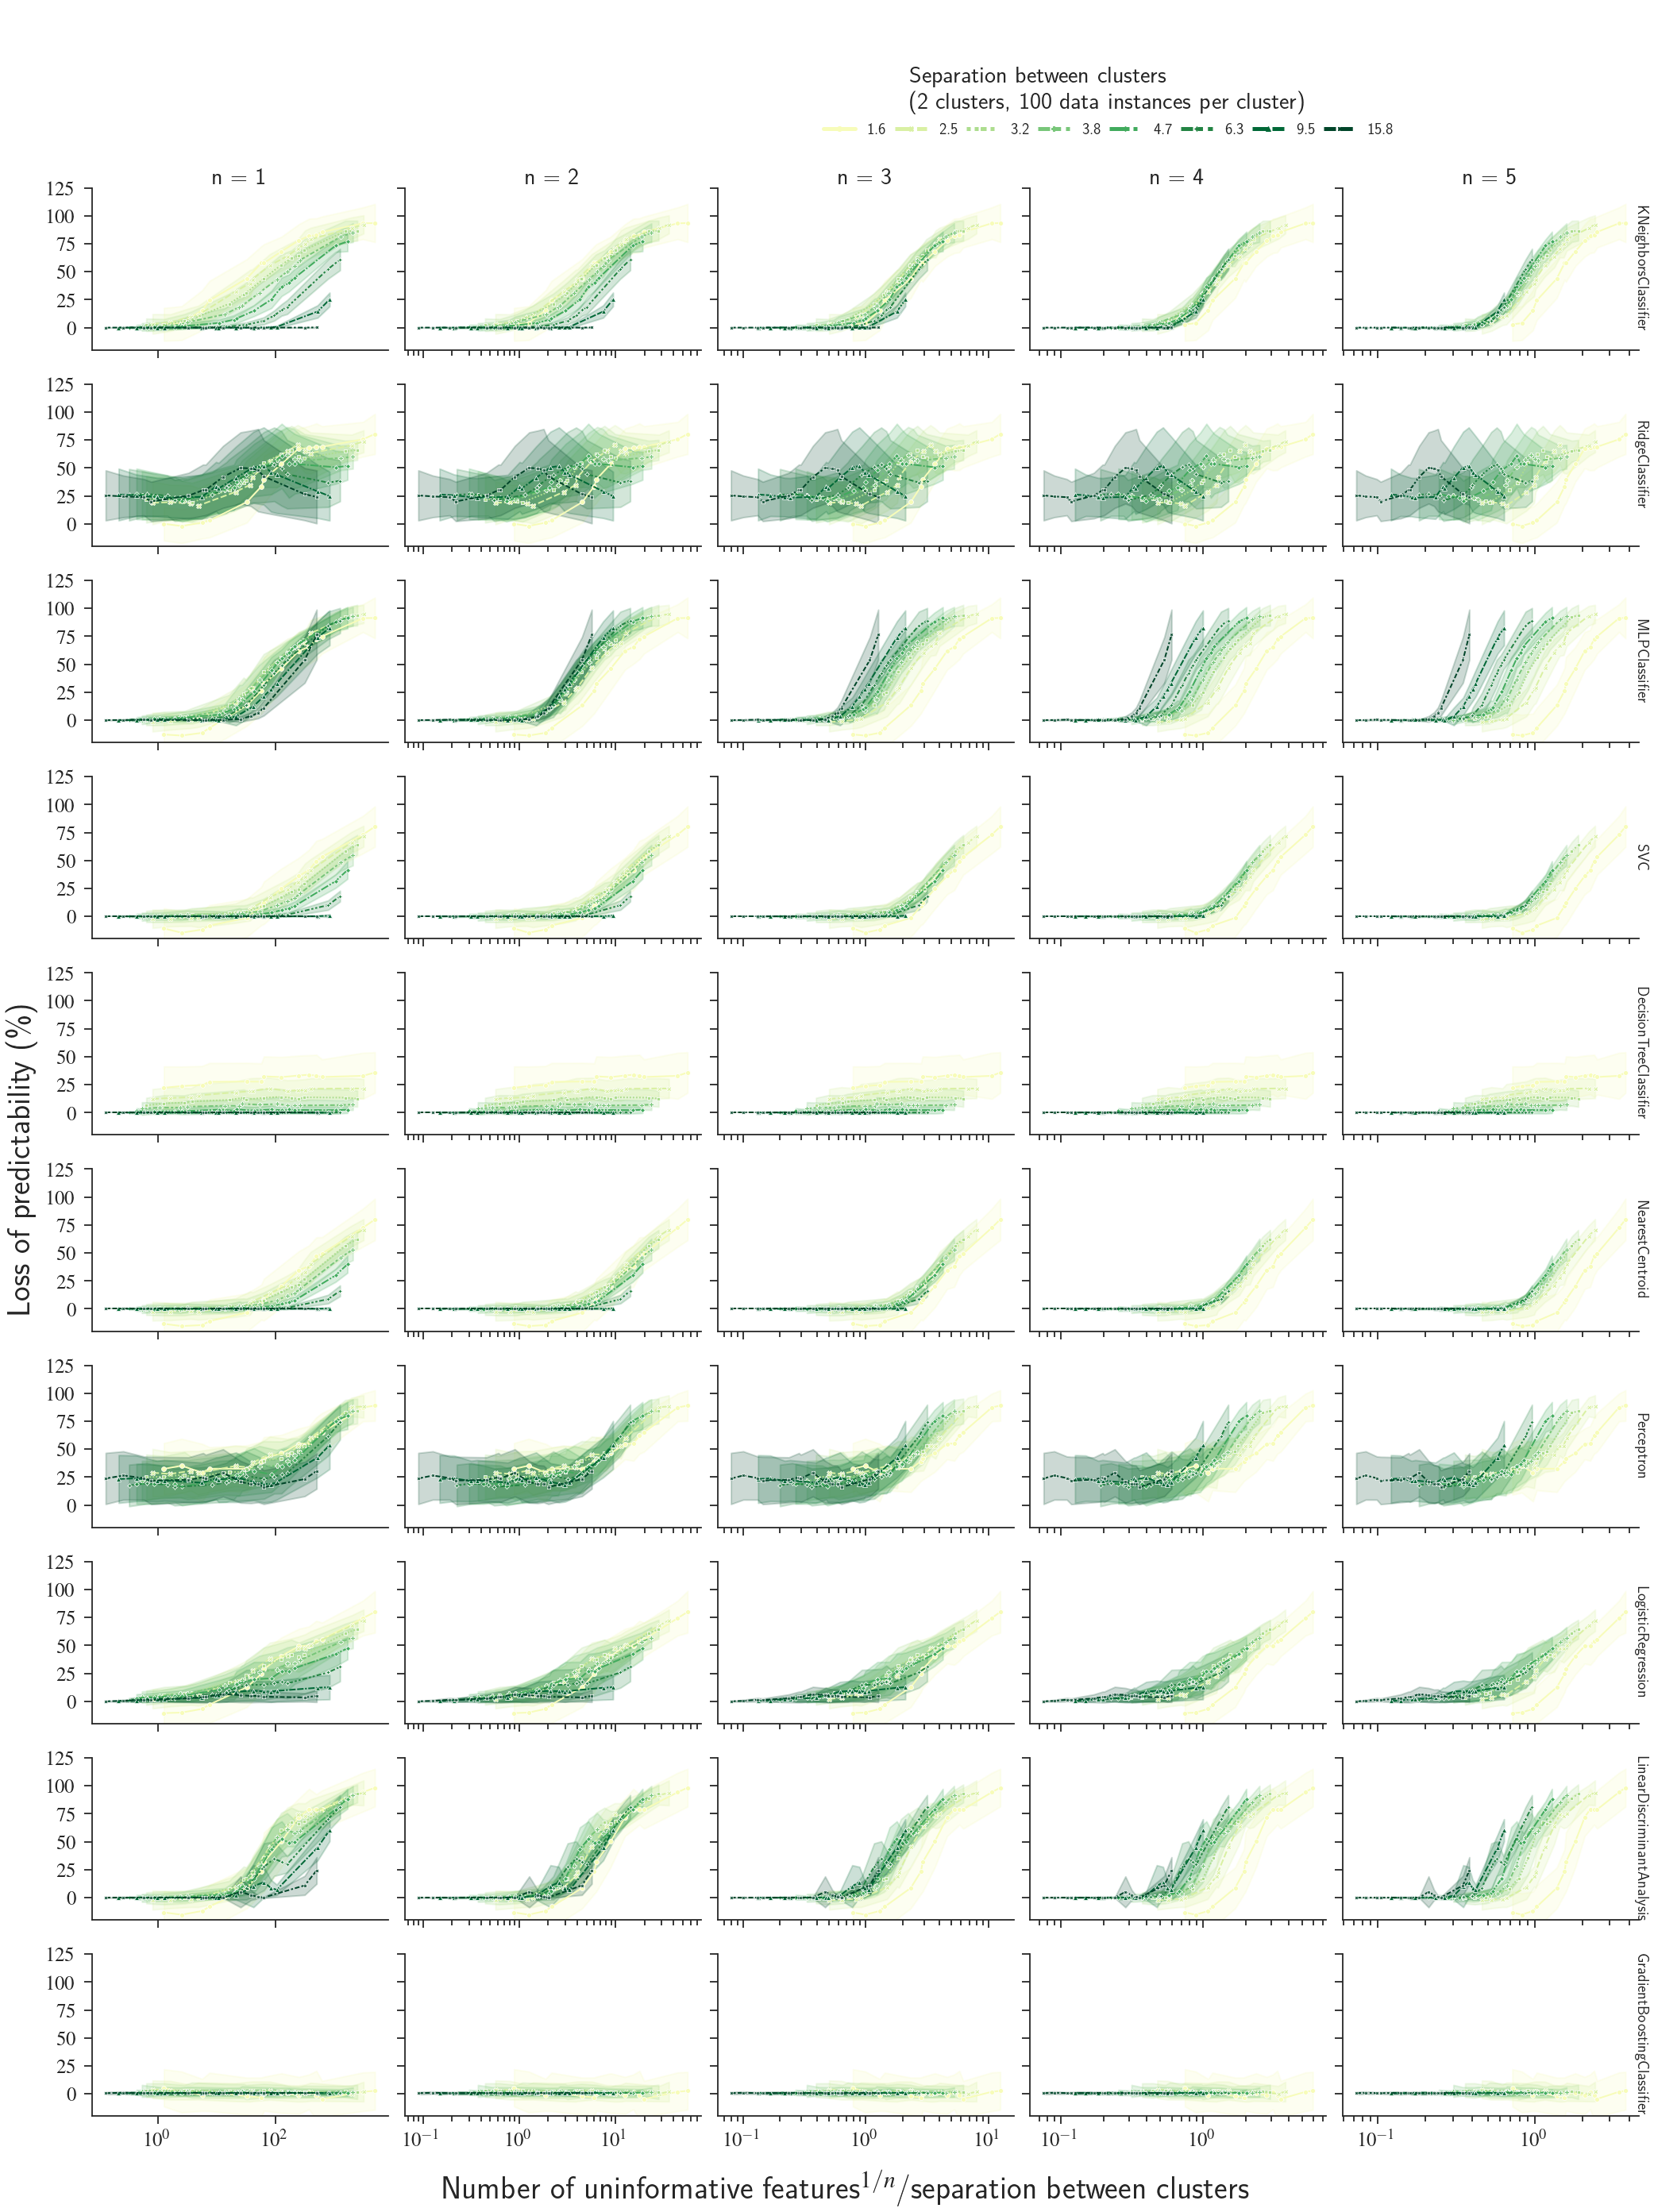

In [11]:
classes_list = ['KNeighborsClassifier', 'RidgeClassifier', 'MLPClassifier',
        'SVC', 'DecisionTreeClassifier','NearestCentroid', 'Perceptron', 'LogisticRegression',
        'LinearDiscriminantAnalysis', 'GradientBoostingClassifier']

orders =  [1,1/2,1/3,1/4,1/5]
hue_order= [i for i in sorted(data['Separation between clusters'].unique())[0:8]]
fig,ax =plt.subplots(10, 5,figsize=(xs*5/2,ys*5))
for nn, cls in enumerate(classes_list):
    df = data[data['Number of samples']==100].copy()
    df=df.explode(cls).reset_index()
    df[cls] = df[cls].astype(float)
    df['Relative loss of accuracy'] = df.apply(lambda row: 
              (acc0[row['Distance between clusters']][row['Number of clusters']]
               -row[cls])/(acc0[row['Distance between clusters']][row['Number of clusters']]-1/row['Number of clusters'])*100,axis=1)
    for i, order in enumerate(orders):   
        df["Feature/Dist ratio"] = df.apply(lambda row: (row["Number of uninformative features"]+2)**(order)/row["Separation between clusters"], axis=1)
        df = df[["Number of uninformative features",
                 'Relative loss of accuracy',
                 'Number of samples',
                 'Feature/Dist ratio',
                 "Separation between clusters",
                 cls]].reset_index(drop=True)

        df['Number of samples'] = df['Number of samples'].astype('int').astype('str')
 
        sns.lineplot(hue="Separation between clusters" ,style="Separation between clusters",y='Relative loss of accuracy',markers=True,
                     x= "Feature/Dist ratio",style_order=hue_order,
                     hue_order=hue_order,
                     palette=sns.color_palette(palette3),
                     data=df,linewidth=2,ax = ax[nn,i], err_style="band",ci='sd',err_kws={'linewidth':2})
        handles, labels = ax[nn,i].get_legend_handles_labels()
        ax[nn,i].get_legend().remove()

        custom_frame(ax[nn,i])
        ax[nn,i].set_xscale('log')

        ax[nn,i].set_ylim(-20,125)
        ax[nn,i].set_yticks([0,25,50,75,100,125])
        ax[nn,i].set_xlabel('') 

        if nn==0:
            ax[nn,i].set_title(f'n = {int(1/order)}',fontsize=30,position=(0.5, 0.95))
        if i==4:
            ax[nn,i].text(1.01, 0.5, f"{cls}",
                horizontalalignment='center',
                verticalalignment='center',
                rotation=-90,fontsize=20,
                transform=ax[nn,i].transAxes)
#             ax[nn,i].text(0.5, 0.5, f'Order= {order}',ha="left",rotation=60)
        if nn!=9:
            ax[nn,i].set_xticklabels([])
            ax[nn,i].tick_params(labelbottom=False)
#         elif nn!=1: ax[nn,i].set_xlabel('') 
        ax[nn,i].set_ylabel('') 
        if i!=0:
            ax[nn,i].set_yticklabels([])
            ax[nn,i].tick_params(labelleft=False)
#         elif nn!=2:
#             ax[nn,i].set_ylabel('') 
plt.subplots_adjust(wspace=0.1,hspace=0.1)
fig.text(0.5, -0.02, r'Number of uninformative features$^{1/n}$/separation between clusters', ha='center',fontsize=40)
fig.text(-0.02, 0.5,'Loss of predictability (\%)',va='center',rotation='vertical',fontsize=40)

fig.legend(handles, 
           labels, 
           bbox_to_anchor = (0.5,1.08),
           loc='upper left', 
           ncol=8, 
           title='Separation between clusters \n (2 clusters, 100 data instances per cluster)',
           title_fontsize=30,
           columnspacing=0.5,
           frameon=False)
plt.tight_layout()
# plt.savefig(f'../PUB_Figs/SFig_D_100.pdf',bbox_inches='tight',transparent=True)
plt.show() 

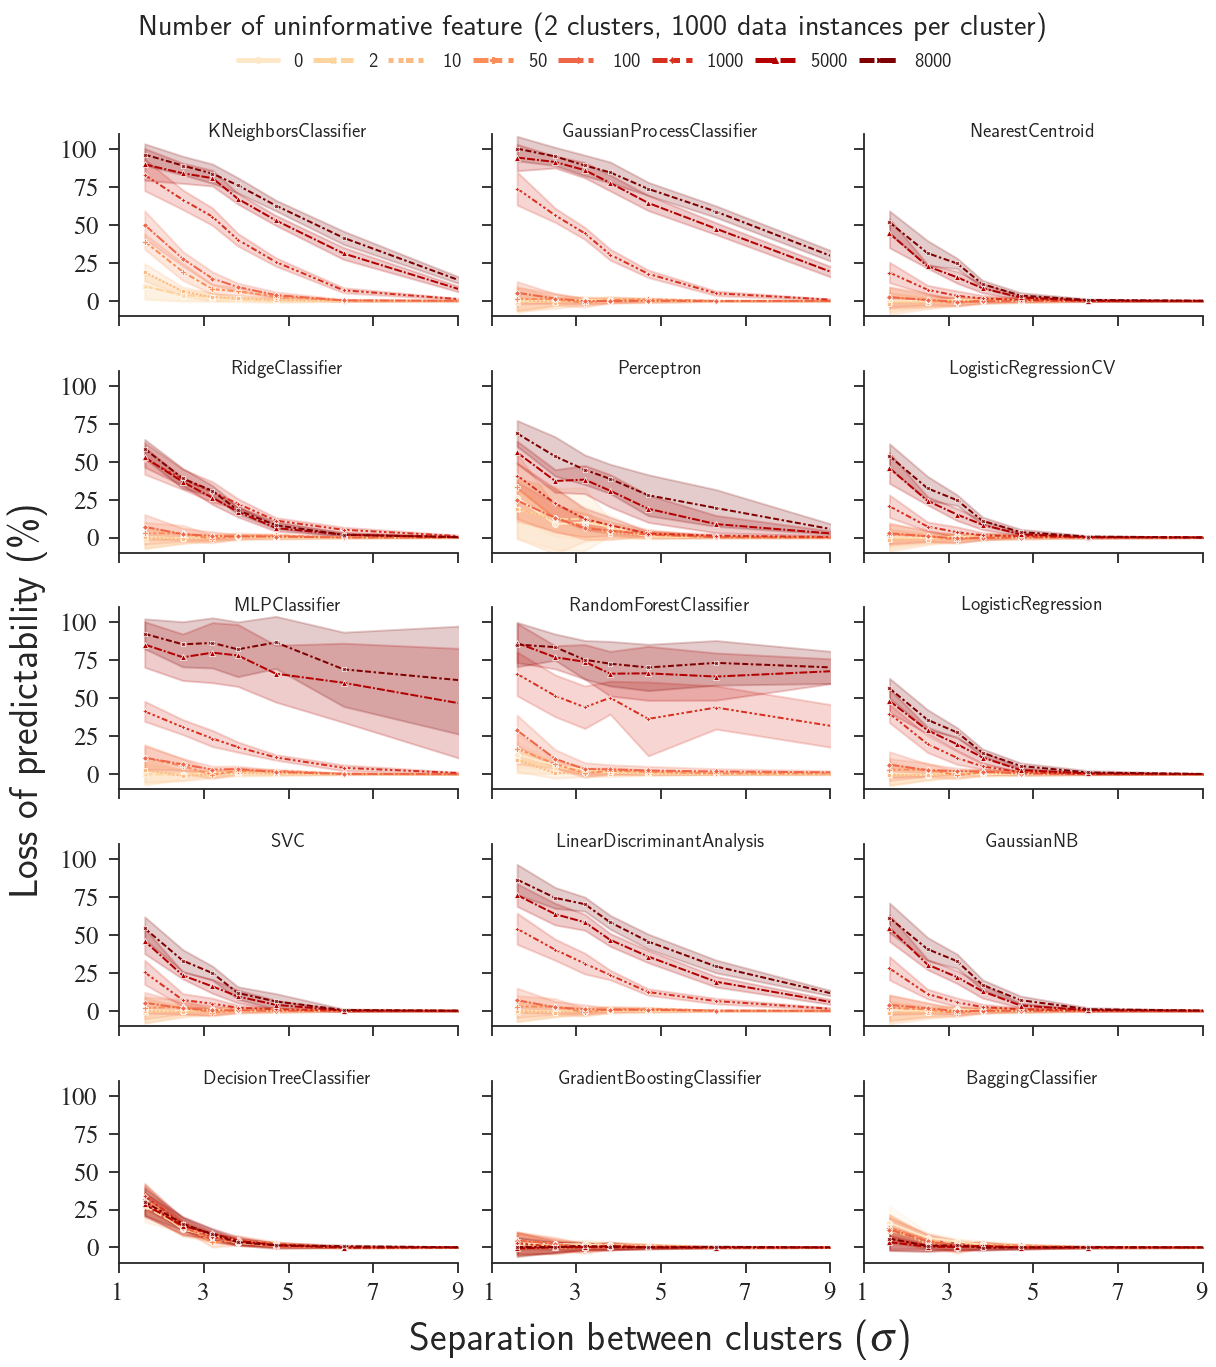

In [12]:
classes_list = [['KNeighborsClassifier', 'GaussianProcessClassifier','NearestCentroid',],
    [ 'RidgeClassifier','Perceptron','LogisticRegressionCV'],
    ['MLPClassifier', 'RandomForestClassifier','LogisticRegression',], 
     [ 'SVC', 'LinearDiscriminantAnalysis', 'GaussianNB'],
    ['DecisionTreeClassifier', 'GradientBoostingClassifier', 'BaggingClassifier'],
]

palette1 = [
    "#fee8c8",
    "#fdd49e",
    "#fdbb84",
    "#fc8d59",
    "#ef6548",
    "#d7301f",
    "#b30000",
    "#7f0000"
]
hue_order= sorted(data['Separation between clusters'].unique())[0:7]
fig,ax =plt.subplots(len(classes_list),3,figsize=(xs*1.5,ys*len(classes_list)/2))
for nn, classes in enumerate(classes_list):
    for i, cls in enumerate(classes):     
        df = data[data["Number of samples"]==1000]
        df = df[df["Number of clusters"]==2]
        df=df.explode(cls).reset_index()
        df[cls] = df[cls].astype(float)
        df['Relative loss of accuracy'] = df.apply(lambda row: 
                  (acc0[row['Distance between clusters']][row['Number of clusters']]
                   -row[cls])/(acc0[row['Distance between clusters']][row['Number of clusters']]-1/row['Number of clusters'])*100,axis=1)

        df = df[["Number of uninformative features",
                 'Relative loss of accuracy',
                 'Number of clusters',
                 "Separation between clusters",
                 cls]].reset_index(drop=True)
        df = df[df["Number of uninformative features"].isin(set([0,2,10,50,100,1000,5000,8000]))]
        if cls == 'BaggingClassifier':
            sns.lineplot(hue="Number of uninformative features",style="Number of uninformative features", y='Relative loss of accuracy',markers=True,
                         x= "Separation between clusters",#style_order=[2,9],
                         hue_order=[0,2,10,50,100,1000,5000,8000],
                         palette=sns.color_palette(palette1),
                         data=df,linewidth=2,ax = ax[nn,i],err_style="band",ci='sd',err_kws={'linewidth':2})
            handles, labels = ax[nn,i].get_legend_handles_labels()
            ax[nn,i].get_legend().remove()
        else:
            sns.lineplot(hue="Number of uninformative features" ,style="Number of uninformative features",y='Relative loss of accuracy',markers=True,
                         x= "Separation between clusters",#style_order=[2,9],
                         hue_order=[0,2,10,50,100,1000,5000,8000],
                         palette=sns.color_palette(palette1),
                         data=df,linewidth=2,legend=None,ax = ax[nn,i], err_style="band",ci='sd',err_kws={'linewidth':2})
        custom_frame(ax[nn,i])
        ax[nn,i].set_xticks([1,3,5,7,9])
        ax[nn,i].set_xlim(1, 9)
        ax[nn,i].set_ylim(-10,110)
        ax[nn,i].set_yticks([0,25,50,75,100])
        ax[nn,i].set_ylabel('Loss of predictability (\%)',fontsize=40)
        ax[nn,i].set_xlabel(r'Separation between clusters ($\sigma$)',fontsize=40)
        ax[nn,i].set_title(f"{cls}",fontsize=20,position=(0.5, 0.9))
        if nn!=len(classes_list)-1:
            ax[nn,i].set_xlabel('') 
            ax[nn,i].set_xticklabels([])
            ax[nn,i].tick_params(labelbottom=False)
        elif i!=1: ax[nn,i].set_xlabel('') 
                
        if i!=0:
            ax[nn,i].set_ylabel('') 
            ax[nn,i].set_yticklabels([])
            ax[nn,i].tick_params(labelleft=False)
        elif nn!=2:
            ax[nn,i].set_ylabel('') 

fig.legend(handles, 
           labels, 
           bbox_to_anchor = (0.1,1.09),
           loc='upper left', 
           ncol=8, 
           title='Number of uninformative feature (2 clusters, 1000 data instances per cluster)',
           title_fontsize=30,
           columnspacing=0.5,
           frameon=False)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1,hspace=0.3)
# plt.savefig(f'../PUB_Figs/SFig_dist.pdf',bbox_inches='tight',transparent=True)
plt.show() 

In [ ]:
classes_list = [['KNeighborsClassifier', 'GaussianProcessClassifier','NearestCentroid',],
    [ 'RidgeClassifier','Perceptron','LogisticRegressionCV'],
    ['MLPClassifier', 'RandomForestClassifier','LogisticRegression',], 
     [ 'SVC', 'LinearDiscriminantAnalysis', 'GaussianNB'],
    ['DecisionTreeClassifier', 'GradientBoostingClassifier', 'BaggingClassifier'],
]

hue_order= sorted(data['Separation between clusters'].unique())[0:8]
fig,ax =plt.subplots(len(classes_list),3,figsize=(xs*1.5,ys*len(classes_list)/2))
for nn, classes in enumerate(classes_list):
    for i, cls in enumerate(classes):     
        df = data[data["Number of samples"]==1000]
        df = df[df["Number of clusters"]==2]
        df=df.explode(cls).reset_index()
        df[cls] = df[cls].astype(float)
        df['Relative loss of accuracy'] = df.apply(lambda row: 
                  (acc0[row['Distance between clusters']][row['Number of clusters']]
                   -row[cls])/(acc0[row['Distance between clusters']][row['Number of clusters']]-1/row['Number of clusters'])*100,axis=1)

        df = df[["Number of uninformative features",
                 'Relative loss of accuracy',
                 'Number of clusters',
                 "Separation between clusters",
                 cls]].reset_index(drop=True)
        df = df[df["Number of uninformative features"].isin(set([0,2,10,50,100,1000,5000,8000]))]
        if cls == 'BaggingClassifier':
            sns.lineplot(hue="Separation between clusters",style="Separation between clusters", y='Relative loss of accuracy',markers=True,
                         x= "Number of uninformative features",#style_order=[2,9],
                         hue_order=hue_order,
                         palette=sns.color_palette(palette3),
                         data=df,linewidth=2,ax = ax[nn,i],err_style="band",ci='sd',err_kws={'linewidth':2})
            handles, labels = ax[nn,i].get_legend_handles_labels()
            ax[nn,i].get_legend().remove()
        else:
            sns.lineplot(hue="Separation between clusters",style="Separation between clusters", y='Relative loss of accuracy',markers=True,
                         x= "Number of uninformative features",#style_order=[2,9],
                         hue_order=hue_order,
                         palette=sns.color_palette(palette3),
                         data=df,linewidth=2,legend=None,ax = ax[nn,i], err_style="band",ci='sd',err_kws={'linewidth':2})
        custom_frame(ax[nn,i])
        ax[nn,i].set_xscale('log')
        ax[nn,i].set_xticks([10,100,1000,10000])
        ax[nn,i].set_ylim(-10,110)
        ax[nn,i].set_yticks([0,25,50,75,100])
        ax[nn,i].set_ylabel('Loss of predictability (\%)',fontsize=40)
        ax[nn,i].set_xlabel('Number of uninformative features',fontsize=40)
        ax[nn,i].set_title(f"{cls}",fontsize=20,position=(0.5, 0.9))
        if nn!=len(classes_list)-1:
            ax[nn,i].set_xlabel('') 
            ax[nn,i].set_xticklabels([])
            ax[nn,i].tick_params(labelbottom=False)
        elif i!=1: ax[nn,i].set_xlabel('') 
                
        if i!=0:
            ax[nn,i].set_ylabel('') 
            ax[nn,i].set_yticklabels([])
            ax[nn,i].tick_params(labelleft=False)
        elif nn!=2:
            ax[nn,i].set_ylabel('') 

fig.legend(handles, 
   labels, 
   bbox_to_anchor = (0.5,1.08),
   loc='upper center', 
   ncol=8, 
   title=r'Separation between clusters $\sigma$ (2 clusters, 1000 data instances per cluster)',
   title_fontsize=30,
   columnspacing=0.5,
   frameon=False)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1,hspace=0.3)
# plt.savefig(f'../PUB_Figs/SFig_dist_v2.pdf',bbox_inches='tight',transparent=True)
plt.show() 